# **1. Perkenalan Dataset**



1. **Sumber Dataset**:  
   Dataset diperoleh dari kaggle: https://www.kaggle.com/datasets/elvinrustam/coursera-dataset?select=CourseraDataset-Unclean.csv
   Dataset ini berisi informasi tentang berbagai kursus yang tersedia di platform coursera. Setiap baris dalam dataset akan mewakili satu kursus, dengan berbagai atribut yang menjelaskan karakteristik kursus tersebut. Beberapa fitur yang tersedia dalam dataset ini:
   * Course title: Nama kursus yang ditawarkan
   * Rating: Nilai rata-rata kursus berdasarkan ulasan pengguna
   * Level: Kategori tingkat kesulitan courses (pemula/menengah/lanjutan)
   * Schedule: Informasi terkait fleksibilitas atau metode pembelajaran kursus
   * What you will learn: Tujuan pembelajaran dan topik yang dibahas
   * Skill gain: Keterampila spesifik yang akan didapat setelah menyelesaikan kursus
   * Modules: Struktur bagian unit belajar
   * Instructor: Nama pengajar kursus
   * Offered by: Institusi atau organisasi yang menyediakan kursus
   * Keyword: tag atau kata kunci terkait kursus
   * Course Url: tautan ke halaman kursus
   * Duration to Complete (Approx.): Estimasi waktu yang dibutuhkan untuk menyelesaikan kursus
   * Number of reviews: Jumlah ulasan

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [ ]:
%pip install -q dagshub mlflow

In [2]:
import mlflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import dagshub
dagshub.init(repo_owner='margaretalola', repo_name='my-first-repo', mlflow=True)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

Initialized MLflow to track repo "margaretalola/my-first-repo"

Repository margaretalola/my-first-repo initialized!

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
#Type your code here
df = pd.read_csv('/kaggle/input/courseradataset/CourseraDataset-Unclean.csv')
df.head(10)

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues
5,So You Think You Know Tango?,4.6,Beginner level,Approx. 5 hours to complete,Flexible schedule,107 reviews,Gain an appreciation for the Argentine Tango a...,[],['Module 1: The Many Dimensions of Tango and T...,['Kristin Wendland'],['Emory University'],Arts and Humanities,https://www.coursera.org/learn/tango
6,The Politics of Skepticism,4.5,Intermediate level,Approx. 13 hours to complete,Flexible schedule,38 reviews,NaN,[],"['Political Origins', 'Skepticism and Religion...","['Tim De Mey', 'Wiep van Bunge']",['Erasmus University Rotterdam'],Arts and Humanities,https://www.coursera.org/learn/erasmus-philoso...
7,Становлення сучасної України,NaN,Beginner level,Approx. 23 hours to complete,Flexible schedule,NaN,NaN,[],['Становлення сучасної України'],['Timothy Snyder'],['Yale University'],Arts and Humanities,https://www.coursera.org/learn/the-making-of-m...
8,Exploring Beethoven's Piano Sonatas Part 4,4.9,Intermediate level,Approx. 5 hours to complete,Flexible schedule,63 reviews,NaN,[],"['Welcome to Class!', 'Op. 2, No. 2', 'Op. 10,...",['Jonathan Biss'],['Curtis Institute of Music'],Arts and Humanities,https://www.coursera.org/learn/exploring-beeth...
9,悖论：思维的魔方,4.8,Beginner level,Approx. 44 hours to complete,Flexible schedule,39 reviews,NaN,[],"['预备知识和悖论概述', '上帝悖论和连锁悖论', '芝诺悖论和无穷之谜', '逻辑-集合...",['陈波'],['Peking University'],Arts and Humanities,https://www.coursera.org/learn/bei-lun


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
#Type your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9595 entries, 0 to 9594
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Course Title         9595 non-null   object 
 1   Rating               8156 non-null   float64
 2   Level                8330 non-null   object 
 3   Duration             9333 non-null   object 
 4   Schedule             8912 non-null   object 
 5   Review               8152 non-null   object 
 6   What you will learn  4984 non-null   object 
 7   Skill gain           9595 non-null   object 
 8   Modules              9595 non-null   object 
 9   Instructor           9595 non-null   object 
 10  Offered By           9595 non-null   object 
 11  Keyword              9595 non-null   object 
 12  Course Url           9595 non-null   object 
dtypes: float64(1), object(12)
memory usage: 974.6+ KB


In [5]:
df.isna().sum()

Course Title              0
Rating                 1439
Level                  1265
Duration                262
Schedule                683
Review                 1443
What you will learn    4611
Skill gain                0
Modules                   0
Instructor                0
Offered By                0
Keyword                   0
Course Url                0
dtype: int64

In [6]:
df.shape

(9595, 13)

In [7]:
df.duplicated().sum()

900

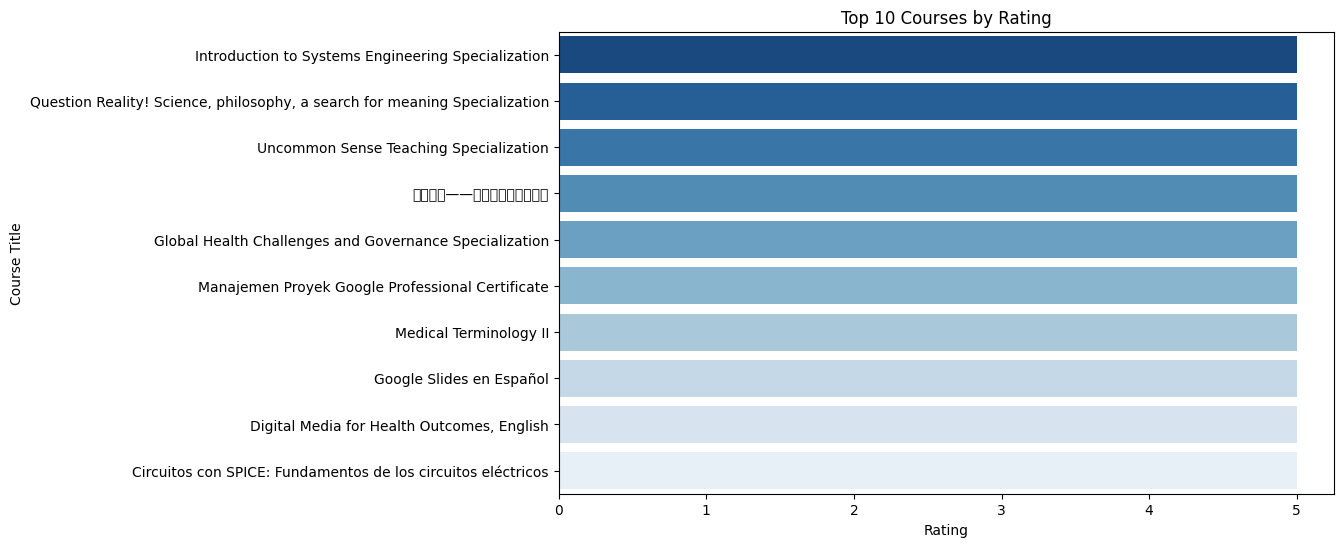

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
1158,Introduction to Systems Engineering Specializa...,5.0,Beginner level,3 months at 5 hours a week,Flexible schedule,25 reviews,"Describe the fundamentals of methods, practice...","['Risk Management', 'Reliability Engineering',...","['The Need for Systems Engineering', 'Applying...",['William Van Atten'],['University of Colorado Boulder'],Business,https://www.coursera.org/specializations/intro...
7653,"Question Reality! Science, philosophy, a searc...",5.0,Beginner level,1 months at 10 hours a week,Flexible schedule,15 reviews,NaN,[],"['Question Reality: Cosmos', 'Question Reality...",['Marcelo Gleiser'],['Dartmouth College'],Physical Science and Engineering,https://www.coursera.org/specializations/quest...
8001,Uncommon Sense Teaching Specialization,5.0,Beginner level,3 months at 4 hours a week,Flexible schedule,164 reviews,You’ll discover how to bring out the best from...,"['Teaching', 'active learning', 'social-emotio...","['Uncommon Sense Teaching', 'Uncommon Sense Te...","['Barbara Oakley', 'Beth Rogowsky', 'David Joy...",['Deep Teaching Solutions'],Social Sciences,https://www.coursera.org/specializations/uncom...
7622,电磁学下——恒磁场与时变电磁场,5.0,NaN,Approx. 18 hours to complete,Flexible schedule,15 reviews,NaN,[],"['模块一 : 恒定磁场的基本规律', '模块二 : 磁力', '模块三 : 磁介质', '...",['Ms 王稼军 WangJiaJun'],['Peking University'],Physical Science and Engineering,https://www.coursera.org/learn/dianci-2
3541,Global Health Challenges and Governance Specia...,5.0,Beginner level,3 months at 10 hours a week,Flexible schedule,6 reviews,"Identify obstacles, be they biomedical, econom...","['Health Policy', 'Health Equity', 'Human Migr...","['Globalisation and health governance', 'Migra...","['Christina Atchison', 'Wendy Kwok']",['Imperial College London'],Health,https://www.coursera.org/specializations/globa...
1335,Manajemen Proyek Google Professional Certificate,5.0,Beginner level,3 months at 10 hours a week,Flexible schedule,369 reviews,Dapatkan pemahaman mendalam tentang praktik da...,"['Manajemen Agile', 'Pemecahan Masalah', 'Pemb...","['Dasar-dasar Manajemen Proyek', 'Inisiasi Pro...",['Google Career Certificates'],['Google'],Business,https://www.coursera.org/professional-certific...
3943,Medical Terminology II,5.0,Beginner level,16 hours (approximately),Flexible schedule,90 reviews,NaN,[],"['Welcome to Medical Terminology Part II', 'En...",['Laura S. Kabiri'],['Rice University'],Health,https://www.coursera.org/learn/medicalterminol...
5129,Google Slides en Español,5.0,Beginner level,3 hours (approximately),Flexible schedule,26 reviews,"Crear, administrar, darle formato y organizar ...",[],"['Introducción al curso', 'Introducción a Pres...",['Google Cloud Training'],['Google Cloud'],Information Technology,https://www.coursera.org/learn/google-slides-es
3554,"Digital Media for Health Outcomes, English",5.0,Intermediate level,Approx. 16 hours to complete,Flexible schedule,29 reviews,NaN,[],"['Behavioral Insights as a Foundation', 'Craft...",['Saad Omer'],['Yale University'],Health,https://www.coursera.org/learn/digital-media-h...
7533,Circuitos con SPICE: Fundamentos de los circui...,5.0,Beginner level,8 hours (approximately),Flexible schedule,17 reviews,NaN,"['aplicación de la Ley de Ohm', 'leyes de Kirc...","['Electricidad', 'SPICE y algunos componentes ...",['Angel Abusleme'],['Pontificia Universidad Católica de Chile'],Physical Science and Engineering,https://www.coursera.org/learn/circuitos-spicey-1


In [8]:
top_courses = df.sort_values(by='Rating', ascending=False).head(10)
# Creating a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Rating', y='Course Title', data=top_courses, palette='Blues_r')

plt.xlabel('Rating')
plt.ylabel('Course Title')
plt.title('Top 10 Courses by Rating')
plt.show()

top_courses

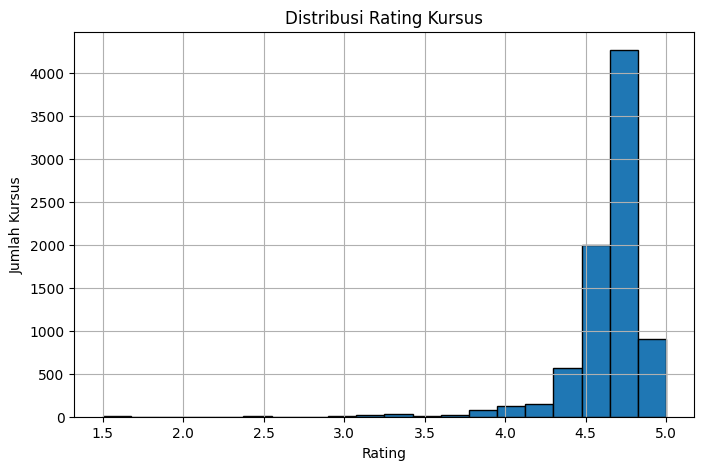

In [9]:
# Distribusi Rating
plt.figure(figsize=(8, 5))
df['Rating'].hist(bins=20, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Jumlah Kursus')
plt.title('Distribusi Rating Kursus')
plt.show()

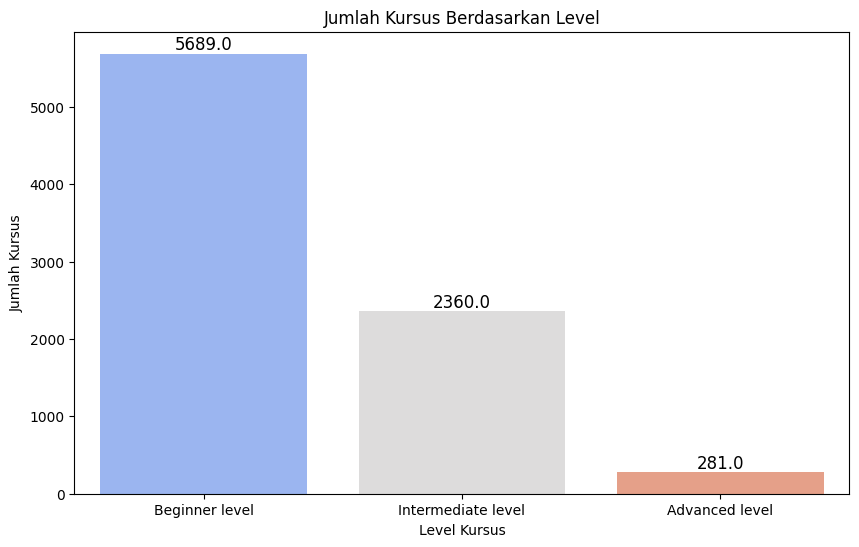

In [10]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Level', data=df, palette='coolwarm')

# Menambahkan label pada setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=12, color='black')

# Memberikan label sumbu
plt.xlabel('Level Kursus')
plt.ylabel('Jumlah Kursus')
plt.title('Jumlah Kursus Berdasarkan Level')
plt.show()

In [11]:
# Filter data untuk Beginner Level
beginner_courses = df[df['Level'] == 'Beginner level']
beginner_courses.head(10)

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
0,Fashion as Design,4.8,Beginner level,20 hours (approximately),Flexible schedule,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']","['Introduction', 'Heroes', 'Silhouettes', 'Cou...","['Anna Burckhardt', 'Paola Antonelli', 'Michel...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/fashion-design
1,Modern American Poetry,4.4,Beginner level,Approx. 34 hours to complete,Flexible schedule,100 reviews,NaN,[],"['Orientation', 'Module 1', 'Module 2', 'Modul...",['Cary Nelson'],['University of Illinois at Urbana-Champaign'],Arts and Humanities,https://www.coursera.org/learn/modern-american...
2,Pixel Art for Video Games,4.5,Beginner level,9 hours (approximately),Flexible schedule,227 reviews,NaN,[],"['Week 1: Introduction to Pixel Art', 'Week 2:...","['Andrew Dennis', 'Ricardo Guimaraes']",['Michigan State University'],Arts and Humanities,https://www.coursera.org/learn/pixel-art-video...
3,Distribución digital de la música independiente,NaN,Beginner level,Approx. 8 hours to complete,Flexible schedule,NaN,NaN,[],"['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4']",['Eduardo de la Vara Brown.'],['SAE Institute México'],Arts and Humanities,https://www.coursera.org/learn/distribucion-di...
4,The Blues: Understanding and Performing an Ame...,4.8,Beginner level,Approx. 11 hours to complete,Flexible schedule,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']","['Blues Progressions – Theory and Practice ', ...",['Dariusz Terefenko'],['University of Rochester'],Arts and Humanities,https://www.coursera.org/learn/the-blues
5,So You Think You Know Tango?,4.6,Beginner level,Approx. 5 hours to complete,Flexible schedule,107 reviews,Gain an appreciation for the Argentine Tango a...,[],['Module 1: The Many Dimensions of Tango and T...,['Kristin Wendland'],['Emory University'],Arts and Humanities,https://www.coursera.org/learn/tango
7,Становлення сучасної України,NaN,Beginner level,Approx. 23 hours to complete,Flexible schedule,NaN,NaN,[],['Становлення сучасної України'],['Timothy Snyder'],['Yale University'],Arts and Humanities,https://www.coursera.org/learn/the-making-of-m...
9,悖论：思维的魔方,4.8,Beginner level,Approx. 44 hours to complete,Flexible schedule,39 reviews,NaN,[],"['预备知识和悖论概述', '上帝悖论和连锁悖论', '芝诺悖论和无穷之谜', '逻辑-集合...",['陈波'],['Peking University'],Arts and Humanities,https://www.coursera.org/learn/bei-lun
11,In the Studio: Postwar Abstract Painting,4.9,Beginner level,Approx. 26 hours to complete,Flexible schedule,"1,421 reviews",NaN,"['Art History', 'Art', 'History', 'Color Theory']","['Introduction', 'Barnett Newman', 'Willem de ...","[""Corey D'Augustine"", 'Alex Roediger']",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/learn/painting
13,Basic Elements of Design: Design Principles an...,4.7,Beginner level,10 hours (approximately),Flexible schedule,925 reviews,Recognize ways to work with graphic designers ...,"['Print Design', 'online design', 'Color Theor...","['What is Graphic Design?', 'Elements of Desig...",['Lori Poole'],['University of Colorado Boulder'],Arts and Humanities,https://www.coursera.org/learn/basic-elements-...


In [12]:
# Filter data untuk Intermediate Level
intermediate_courses = df[df['Level'] == 'Intermediate level']
intermediate_courses.head(10)

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
6,The Politics of Skepticism,4.5,Intermediate level,Approx. 13 hours to complete,Flexible schedule,38 reviews,NaN,[],"['Political Origins', 'Skepticism and Religion...","['Tim De Mey', 'Wiep van Bunge']",['Erasmus University Rotterdam'],Arts and Humanities,https://www.coursera.org/learn/erasmus-philoso...
8,Exploring Beethoven's Piano Sonatas Part 4,4.9,Intermediate level,Approx. 5 hours to complete,Flexible schedule,63 reviews,NaN,[],"['Welcome to Class!', 'Op. 2, No. 2', 'Op. 10,...",['Jonathan Biss'],['Curtis Institute of Music'],Arts and Humanities,https://www.coursera.org/learn/exploring-beeth...
12,Philosophy of Science,4.7,Intermediate level,Approx. 12 hours to complete,Flexible schedule,208 reviews,NaN,[],"['Introduction and Core Examples ', 'Scientifi...",['Michael Weisberg'],['University of Pennsylvania'],Arts and Humanities,https://www.coursera.org/learn/philosophy-of-s...
18,Shaping Urban Futures,4.7,Intermediate level,Approx. 21 hours to complete,Flexible schedule,28 reviews,NaN,"['Urban sciences', 'Urban research', 'Knowledg...","['Shaping Urban Futures: An Introduction', 'Ho...","['Michael Keith', 'Gautam Bhan', 'Pengjun Zhao...",['Indian Institute for Human Settlements'],Arts and Humanities,https://www.coursera.org/learn/shaping-urban-f...
42,Electronic Music Production Specialization,4.8,Intermediate level,1 months at 10 hours a week,Flexible schedule,520 reviews,The nature of sound and how natural sound is t...,"['MIDI programming', 'File Management', 'Audio...","['The Technology of Music Production', 'Introd...","['Loudon Stearns', 'Erin Barra', 'Rishabh Rajan']",['Berklee'],Arts and Humanities,https://www.coursera.org/specializations/elect...
49,"Teaching with Art: Using Inquiry, Activities, ...",4.9,Intermediate level,1 months at 10 hours a week,Flexible schedule,36 reviews,"Learn the ways inquiry, activities, and access...","['Develop open-ended inquiry-based lessons', '...",['Art & Inquiry: Museum Teaching Strategies Fo...,"['Francis Estrada', 'Lisa Mazzola', 'Larissa R...",['The Museum of Modern Art'],Arts and Humanities,https://www.coursera.org/specializations/teach...
65,The Art of Music Production,4.8,Intermediate level,13 hours (approximately),Flexible schedule,"1,976 reviews",Discuss why one musical recording is more comp...,"['Music', 'Songwriting', 'Music production', '...","['Welcome to The Art of Music Production', 'Li...",['Stephen Webber'],['Berklee'],Arts and Humanities,https://www.coursera.org/learn/producing-music
84,Introduction to Ancient Egypt and Its Civiliza...,4.6,Intermediate level,Approx. 8 hours to complete,Flexible schedule,"2,674 reviews",NaN,"['Art History', 'Art', 'History', 'Mythology']","['Welcome to the Course ', 'History and Chrono...",['David P. Silverman'],['University of Pennsylvania'],Arts and Humanities,https://www.coursera.org/learn/introancientegypt
114,Brand New Brand,4.9,Intermediate level,24 hours (approximately),Flexible schedule,"1,190 reviews","Synthesize typography, imagemaking, compositio...","['Adobe Photoshop', 'Adobe Indesign', 'Graphic...","['Course Overview', 'Ideation: Invent Your Cli...",['Michael Worthington'],['California Institute of the Arts'],Arts and Humanities,https://www.coursera.org/learn/brand-new-brand
115,Tecnología musical con software libre Speciali...,4.8,Intermediate level,1 months at 10 hours a week,Flexible schedule,168 reviews,NaN,"['netnography', 'Backcasting', 'Natural Langua...","['Introducción a la producción musical ', 'Gra...","['Nicolás Mariñelarena', 'Cristian Manuel Bañu...",['Universidad Nacional Autónoma de México'],Arts and Humanities,https://www.coursera.org/specializations/tecno...


In [13]:
# Filter data untuk Advance Level
advanced_courses = df[df['Level'] == 'Advanced level']
advanced_courses.head(10)

,Course Title,Rating,Level,Duration,Schedule,Review,What you will learn,Skill gain,Modules,Instructor,Offered By,Keyword,Course Url
411,品读道家的智慧,4.7,Advanced level,Approx. 22 hours to complete,Flexible schedule,67 reviews,NaN,[],"['绪论', '道家的渊源和宗旨', '老子其人其书', '老子其道', '庄子其人其书',...",['韩 鹏杰'],"[""Xi'an Jiaotong University""]",Arts and Humanities,https://www.coursera.org/learn/daojiao
516,Google Business Intelligence Professional Cert...,4.7,Advanced level,2 months at 10 hours a week,Flexible schedule,"1,001 reviews",Explore the roles of business intelligence (BI...,"['Business Intelligence', 'Extraction, Transfo...","['Foundations of Business Intelligence', 'The ...",['Google Career Certificates'],['Google'],Business,https://www.coursera.org/professional-certific...
522,Data Warehousing for Business Intelligence Spe...,4.5,Advanced level,8 months at 10 hours a week,Flexible schedule,"2,389 reviews",NaN,"['Pentaho', 'SQL', 'Data Visualization', 'Data...","['Database Management Essentials', 'Data Wareh...","['Michael Mannino', 'Jahangir Karimi']",['University of Colorado System'],Business,https://www.coursera.org/specializations/data-...
556,Advanced Financial Reporting: Accounting for B...,4.7,Advanced level,Approx. 24 hours to complete,Flexible schedule,171 reviews,NaN,[],"['Course Orientation', 'Module 1: Control of a...","['Michael Kustanovich, CPA']",['University of Illinois at Urbana-Champaign'],Business,https://www.coursera.org/learn/advanced-financ...
572,Strategic Business Analytics Specialization,4.4,Advanced level,1 months at 10 hours a week,Flexible schedule,752 reviews,NaN,['Marketing Performance Measurement And Manage...,['Foundations of strategic business analytics'...,"['Nicolas Glady ', 'Arnaud De Bruyn']",['ESSEC Business School'],Business,https://www.coursera.org/specializations/strat...
650,Leading a Family Business Specialization,NaN,Advanced level,2 months at 10 hours a week,Flexible schedule,NaN,Develop strategies for entrepreneurship and tr...,['Identify basic concepts of innovative entrep...,"['Entrepreneurial Mindset', 'Leadership in the...","['David S. Xotlanihua-González', ' Luis Antoni...",['Tecnológico de Monterrey'],Business,https://www.coursera.org/specializations/leadi...
654,Foundations of Business Intelligence,4.7,Advanced level,31 hours (approximately),Flexible schedule,828 reviews,Understand common careers and industries that ...,"['Business Processes and Requirements', 'Shari...",['Data-driven results through business intelli...,['Google Career Certificates'],['Google'],Business,https://www.coursera.org/learn/foundations-of-...
731,Design and innovation of business model,NaN,Advanced level,27 hours (approximately),Flexible schedule,NaN,NaN,['Organize complexity through: visual thinking...,"['Topic 1. Introduction, Concept, and History ...",[' Luis Antonio Marquez Heine'],['Tecnológico de Monterrey'],Business,https://www.coursera.org/learn/design-and-inno...
750,"Advanced Valuation and Strategy - M&A, Private...",4.6,Advanced level,Approx. 16 hours to complete,Flexible schedule,"1,194 reviews",NaN,[],"['Executive Summary', 'Discounted Cash Flow An...","['Nishad Matawlie', 'Han Smit', 'Yashvir Ganga...",['Erasmus University Rotterdam'],Business,https://www.coursera.org/learn/advanced-valuat...
851,Leadership in the Family Business,NaN,Advanced level,29 hours (approximately),Flexible schedule,NaN,"Apply strategies, tools and models to lead and...",[],['Topic 1. Fundamentals of the Family Business...,"['David S. Xotlanihua-González', 'Dr. Fernando...",['Tecnológico de Monterrey'],Business,https://www.coursera.org/learn/leadership-in-t...


In [14]:
# Menampilkan nilai yang paling sering muncul (modus)
most_common_duration = df['Duration'].mode()[0]
print(f"Durasi kursus yang paling banyak adalah {most_common_duration} jam.\n-----")
print(df['Duration'].value_counts().head(10))


df['Duration'].describe()

Durasi kursus yang paling banyak adalah 1 months at 10 hours a week jam.
-----
Duration
1 months at 10 hours a week     718
2 months at 10 hours a week     493
11 hours (approximately)        210
Approx. 13 hours to complete    204
2 hours                         201
Approx. 10 hours to complete    193
Approx. 14 hours to complete    189
Approx. 11 hours to complete    187
10 hours (approximately)        184
9 hours (approximately)         179
Name: count, dtype: int64


count                            9333
unique                            215
top       1 months at 10 hours a week
freq                              718
Name: Duration, dtype: object

In [15]:
# Menampilkan institusi yang paling banyak menawarkan kursus
print(df['Offered By'].value_counts().head(10))

Offered By
['Coursera Project Network']                      563
['University of Colorado Boulder']                452
['Google']                                        338
['University of Michigan']                        324
['Johns Hopkins University']                      298
['IBM']                                           297
['Google Cloud']                                  296
['University of Pennsylvania']                    250
['University of Illinois at Urbana-Champaign']    231
['University of Colorado System']                 148
Name: count, dtype: int64


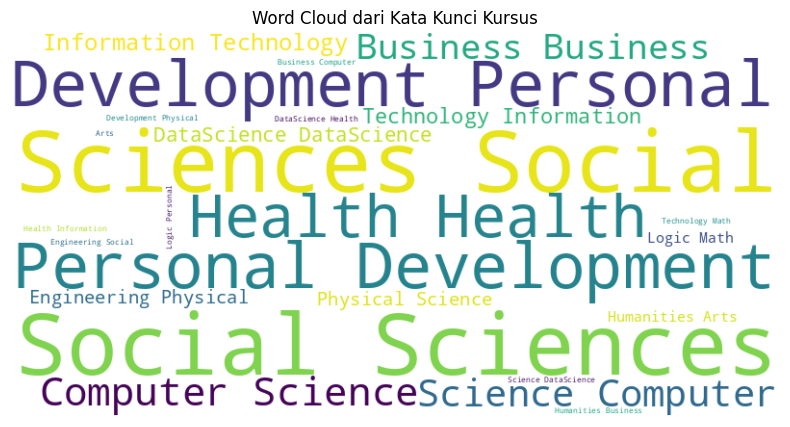

In [16]:
from wordcloud import WordCloud

# Gabungkan semua keyword menjadi satu string
text = " ".join(df['Keyword'].dropna())

# Membuat word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Tampilkan word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud dari Kata Kunci Kursus")
plt.show()

In [17]:
from collections import Counter

word_freq = Counter(text.split())
print(word_freq.most_common(10))

[('Social', 1896), ('Sciences', 1896), ('Science', 1800), ('and', 1780), ('Personal', 993), ('Development', 993), ('Health', 992), ('Computer', 988), ('Business', 985), ('Information', 982)]


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [18]:
df.isna().sum()

Course Title              0
Rating                 1439
Level                  1265
Duration                262
Schedule                683
Review                 1443
What you will learn    4611
Skill gain                0
Modules                   0
Instructor                0
Offered By                0
Keyword                   0
Course Url                0
dtype: int64

In [19]:
df.drop_duplicates(inplace=True)
print(f"Jumlah duplikasi setelah dihapus: {df.duplicated().sum()}")

Jumlah duplikasi setelah dihapus: 0


In [20]:
df['Rating'].fillna(df['Rating'].mean(), inplace=True)

In [21]:
# Hapus feature
df = df.drop(['Course Url', 'Modules', 'Instructor', 'Schedule', 'Duration'], axis=1)

df.head(5)

,Course Title,Rating,Level,Review,What you will learn,Skill gain,Offered By,Keyword
0,Fashion as Design,4.800000,Beginner level,"2,813 reviews",NaN,"['Art History', 'Art', 'History', 'Creativity']",['The Museum of Modern Art'],Arts and Humanities
1,Modern American Poetry,4.400000,Beginner level,100 reviews,NaN,[],['University of Illinois at Urbana-Champaign'],Arts and Humanities
2,Pixel Art for Video Games,4.500000,Beginner level,227 reviews,NaN,[],['Michigan State University'],Arts and Humanities
3,Distribución digital de la música independiente,4.648952,Beginner level,NaN,NaN,[],['SAE Institute México'],Arts and Humanities
4,The Blues: Understanding and Performing an Ame...,4.800000,Beginner level,582 reviews,Students will be able to describe the blues as...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']",['University of Rochester'],Arts and Humanities


In [22]:
# Hilangkan koma dan kata 'reviews' lalu ubah ke float
df['Review'] = df['Review'].str.replace(',', '').str.replace(' reviews', '').astype(float)

In [23]:
df['What you will learn'] = df['What you will learn'].fillna('')
df['Skill gain'] = df['Skill gain'].fillna('[]')
df['Review'] = df['Review'].fillna(0)

In [24]:
df['Level'] = df['Level'].fillna('Unknown')

In [25]:
def clean_text(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)  # Hapus karakter non-huruf
    text = text.lower()  # Ubah ke huruf kecil semua
    text = text.split()
    lemmatizer = WordNetLemmatizer()
    stop_words = set(stopwords.words('english'))
    text = [lemmatizer.lemmatize(word) for word in text if word not in stop_words]
    return ' '.join(text)

df['Course Title'] = df['Course Title'].astype(str).apply(clean_text)
df['What you will learn'] = df['What you will learn'].astype(str).apply(clean_text)

In [26]:
from sklearn.preprocessing import LabelEncoder

with mlflow.start_run(run_name="Label_Encoding_Example"):
    label_encoder = LabelEncoder()
    
    df['Level'] = label_encoder.fit_transform(df['Level'])
    df['Keyword'] = label_encoder.fit_transform(df['Keyword'])

    # Log informasi tentang encoding
    mlflow.log_param("encoding_method_level", "Label Encoding")
    mlflow.log_param("encoded_column", "Level & Keywords")
    mlflow.log_param("original_labels", list(label_encoder.classes_))
    mlflow.log_param("encoded_values", list(range(len(label_encoder.classes_))))

🏃 View run Label_Encoding_Example at: https://dagshub.com/margaretalola/my-first-repo.mlflow/#/experiments/0/runs/58863c7216504d94bf09cbb8de192ee1
🧪 View experiment at: https://dagshub.com/margaretalola/my-first-repo.mlflow/#/experiments/0


In [27]:
df['Keyword'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

'Arts and Humanities', 'Business', 'Computer Science',
       'DataScience', 'Health', 'Information Technology',
       'Math and Logic', 'Personal Development',
       'Physical Science and Engineering', 'Social Sciences'

In [28]:
df['Level'].unique()

array([1, 2, 3, 0])

begineer, intermediate, advance(0)

In [29]:
df['Skill gain'] = df['Skill gain'].astype(str)
df['Offered By'] = df['Offered By'].astype(str)

In [30]:
df

,Course Title,Rating,Level,Review,What you will learn,Skill gain,Offered By,Keyword
0,fashion design,4.800000,1,2813.0,,"['Art History', 'Art', 'History', 'Creativity']",['The Museum of Modern Art'],0
1,modern american poetry,4.400000,1,100.0,,[],['University of Illinois at Urbana-Champaign'],0
2,pixel art video game,4.500000,1,227.0,,[],['Michigan State University'],0
3,distribuci n digital de la sica independiente,4.648952,1,0.0,,[],['SAE Institute México'],0
4,blue understanding performing american art form,4.800000,1,582.0,student able describe blue important musical f...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']",['University of Rochester'],0
...,...,...,...,...,...,...,...,...
8690,architecting google kubernetes engine producti...,4.900000,2,30.0,,[],['Google Cloud'],9
8691,computational thinking k educator nested state...,4.648952,1,0.0,,"['Education', 'want', 'Resource', 'Causality']",['University of California San Diego'],9
8692,c mo combinar analizar datos complejos,4.648952,3,0.0,,[],"['University of Maryland, College Park']",9
8693,architecting google kubernetes engine workload...,4.648952,2,0.0,,[],['Google Cloud'],9


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer

with mlflow.start_run(run_name='Extraction_TF-Idf'):
    vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
    tfidf_matrix = vectorizer.fit_transform(df['What you will learn'])
    
    # Convert to DataFrame
    learn_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

    # Log ke MLflow
    mlflow.log_param('Feature_extraction_method', 'TF-IDF')
    mlflow.log_param('Original column', 'What you will learn')

🏃 View run Extraction_TF-Idf at: https://dagshub.com/margaretalola/my-first-repo.mlflow/#/experiments/0/runs/c285f5cdd3314a7e8a6cd905c9345e10
🧪 View experiment at: https://dagshub.com/margaretalola/my-first-repo.mlflow/#/experiments/0


In [32]:
with mlflow.start_run(run_name='concat_extraction'):
    df = pd.concat([df.reset_index(drop=True), learn_df.reset_index(drop=True)], axis=1)
    mlflow.log_param('concat extraction', 'TFIDF extraction')

🏃 View run concat_extraction at: https://dagshub.com/margaretalola/my-first-repo.mlflow/#/experiments/0/runs/8c08f016ec094525858e45233b75463a
🧪 View experiment at: https://dagshub.com/margaretalola/my-first-repo.mlflow/#/experiments/0


In [33]:
df

,Course Title,Rating,Level,Review,What you will learn,Skill gain,Offered By,Keyword,able,ai,...,understanding,use,used,user,using,value,various,web,work,world
0,fashion design,4.800000,1,2813.0,,"['Art History', 'Art', 'History', 'Creativity']",['The Museum of Modern Art'],0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,modern american poetry,4.400000,1,100.0,,[],['University of Illinois at Urbana-Champaign'],0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,pixel art video game,4.500000,1,227.0,,[],['Michigan State University'],0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,distribuci n digital de la sica independiente,4.648952,1,0.0,,[],['SAE Institute México'],0,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,blue understanding performing american art form,4.800000,1,582.0,student able describe blue important musical f...,"['Music', 'Chord', 'Jazz', 'Jazz Improvisation']",['University of Rochester'],0,0.93041,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8690,architecting google kubernetes engine producti...,4.900000,2,30.0,,[],['Google Cloud'],9,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8691,computational thinking k educator nested state...,4.648952,1,0.0,,"['Education', 'want', 'Resource', 'Causality']",['University of California San Diego'],9,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8692,c mo combinar analizar datos complejos,4.648952,3,0.0,,[],"['University of Maryland, College Park']",9,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
8693,architecting google kubernetes engine workload...,4.648952,2,0.0,,[],['Google Cloud'],9,0.00000,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
